In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing data.py

import sys
from pathlib import Path

# Get current notebook folder (notebooks/)
notebook_dir = Path().resolve()

# Go up one level to project root
project_root = notebook_dir.parent

# Add project root to Python path
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import from src
from src import data


In [3]:
rawData = data.load_data()
rawData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Summarize the features
summary = pandas.DataFrame(columns=rawData.columns)

# Creating isCategorical row
summary.loc['isCategorical', rawData.columns] = [
    'Yes' if pandas.api.types.is_object_dtype(rawData[col]) else 'No'
    for col in rawData.columns
]

# Creating hasNA row
summary.loc['hasNA', rawData.columns] = [
    'Yes' if rawData[col].isna().any() else 'No'
    for col in rawData.columns
]

# computing range of numeric variables
for col in summary.columns:
    if summary.loc['isCategorical', col] == "Yes":
        continue
    summary.loc['min', col] = min(rawData[col])
    summary.loc['max', col] = max(rawData[col])
print("Numerical feature ranges:")
print(summary)



Numerical feature ranges:
              age  sex    bmi children smoker region      charges
isCategorical  No  Yes     No       No    Yes    Yes           No
hasNA          No   No     No       No     No     No           No
min            18  NaN  15.96        0    NaN    NaN    1121.8739
max            64  NaN  53.13        5    NaN    NaN  63770.42801


There are no missing values and data types are correct.


 Categorical feature class distributions:
         sex smoker region
count   1338   1338   1338
unique     2      2      4
top     male     no     SE
freq     676   1064    364

Numerical feature class distributions:


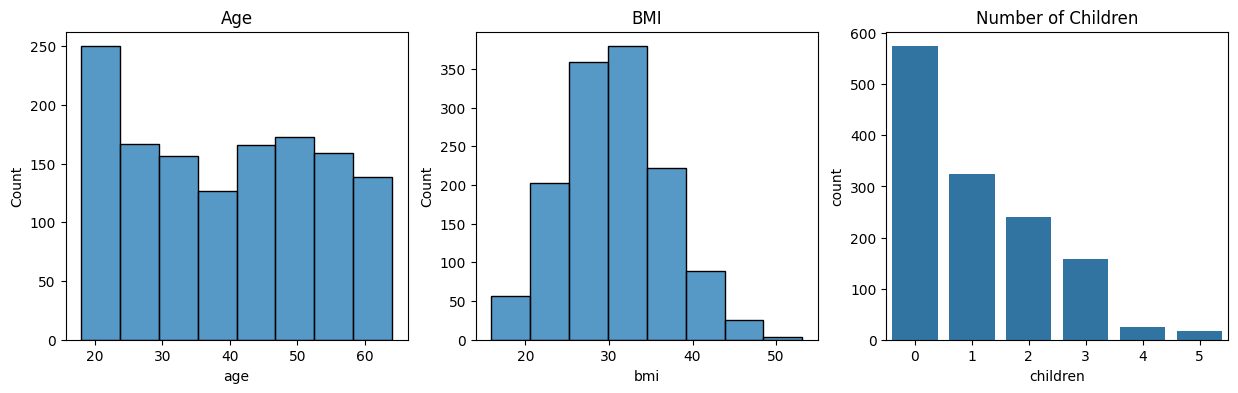

In [5]:
# Features distributions  
# Clean data to add classification target
insData = data.clean_data(rawData)

print("\n Categorical feature class distributions:")
print(insData.describe(include=["object"]))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes = axes.flatten()

sns.histplot(insData['age'], bins=8, ax=axes[0])
axes[0].set_title('Age')

sns.histplot(insData['bmi'], bins=8, ax=axes[1])
axes[1].set_title('BMI')

sns.countplot(x='children', data=insData, ax=axes[2])
axes[2].set_title('Number of Children')

print("\nNumerical feature class distributions:")
plt.show();


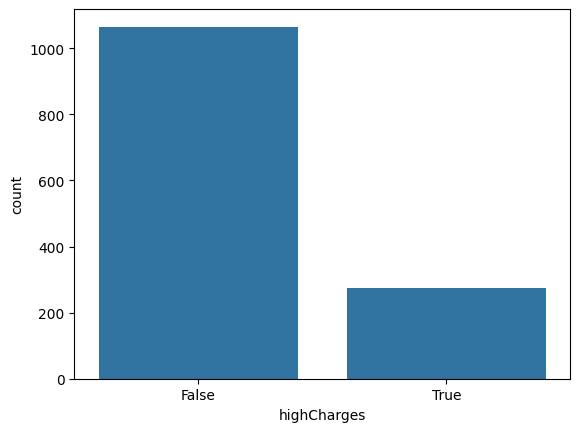

In [11]:
# Target Variable Distribution
sns.countplot(x="highCharges", data=insData)
plt.show()

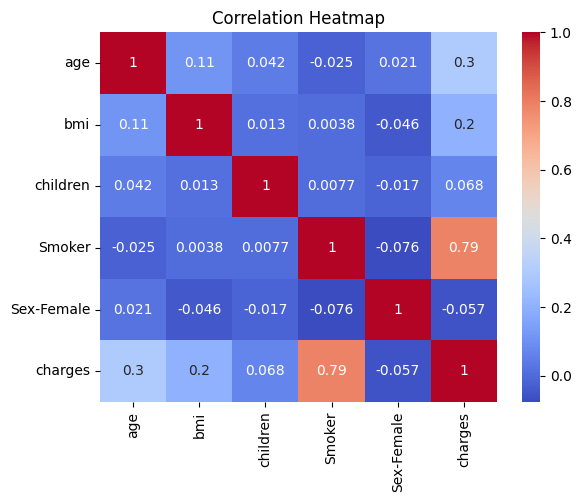

In [10]:
# Correlation heatmap
numericData = insData.select_dtypes(include=['int64', 'float64'])

numericData.insert(3, "Sex-Female", insData["sex"]=="female") 
numericData.insert(3, "Smoker", insData["smoker"]=="yes") 

sns.heatmap(numericData.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

- Smoking is highly correlated with insurance charges.
- Age and BMI are weakly correlated.
- Surprisingly the number of children is not highly correlated.

In [12]:
print(insData['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']
